## Creating a model to predict whether a student will pass or fail based on different features

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("student-data.csv")

In [3]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [6]:
data.shape

(395, 31)

In [7]:
data["passed"].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [8]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

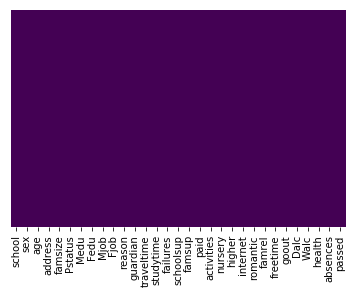

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [10]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [11]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908


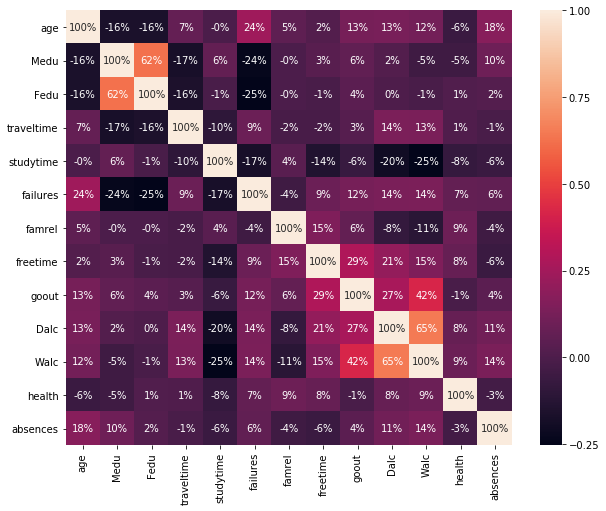

In [12]:
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(),annot=True,fmt='0.0%')
plt.show()

In [13]:
numerical_data = data.select_dtypes(exclude='object')
object_data = data.select_dtypes(include='object')

In [14]:
object_data.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,yes
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,yes


In [15]:
object_data.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'passed'],
      dtype='object')

In [16]:
object_data = object_data.replace(("no","yes"),(0,1))

In [17]:
object_data.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
0,GP,F,U,GT3,A,at_home,teacher,course,mother,1,0,0,0,1,1,0,0,0
1,GP,F,U,GT3,T,at_home,other,course,father,0,1,0,0,0,1,1,0,0
2,GP,F,U,LE3,T,at_home,other,other,mother,1,0,1,0,1,1,1,0,1
3,GP,F,U,GT3,T,health,services,home,mother,0,1,1,1,1,1,1,1,1
4,GP,F,U,GT3,T,other,other,home,father,0,1,1,0,1,1,0,0,1


In [18]:
print("School:  ", object_data['school'].unique())
print("sex:     ", object_data['sex'].unique())
print("Address: ", object_data['address'].unique())
print("Famsize: ", object_data['famsize'].unique())
print("Pstatus: ", object_data['Pstatus'].unique())
print("mjob:    ", object_data['Mjob'].unique())
print("Fjob:    ", object_data['Fjob'].unique())
print("Reason:  ", object_data['reason'].unique())
print("guardian:", object_data['guardian'].unique())

School:   ['GP' 'MS']
sex:      ['F' 'M']
Address:  ['U' 'R']
Famsize:  ['GT3' 'LE3']
Pstatus:  ['A' 'T']
mjob:     ['at_home' 'health' 'other' 'services' 'teacher']
Fjob:     ['teacher' 'other' 'services' 'health' 'at_home']
Reason:   ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']


In [19]:
object_data['school'] = object_data['school'].astype('category').cat.codes
object_data['sex'] = object_data['sex'].astype('category').cat.codes
object_data['address'] = object_data['address'].astype('category').cat.codes
object_data['famsize'] = object_data['famsize'].astype('category').cat.codes
object_data['Pstatus'] = object_data['Pstatus'].astype('category').cat.codes

In [20]:
object_data['Mjob'] = object_data['Mjob'].astype("category")
object_data['Mjob'] = object_data['Mjob'].cat.codes
object_data['Mjob'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [21]:
object_data['Fjob'] = object_data['Fjob'].astype("category").cat.codes
object_data['reason'] = object_data['reason'].astype("category").cat.codes
object_data['guardian'] = object_data['guardian'].astype("category").cat.codes

In [22]:
print("School:  ", object_data['school'].unique())
print("sex:     ", object_data['sex'].unique())
print("Address: ", object_data['address'].unique())
print("Famsize: ", object_data['famsize'].unique())
print("Pstatus: ", object_data['Pstatus'].unique())
print("mjob:    ", object_data['Mjob'].unique())
print("Fjob:    ", object_data['Fjob'].unique())
print("Reason:  ", object_data['reason'].unique())
print("guardian:", object_data['guardian'].unique())

School:   [0 1]
sex:      [0 1]
Address:  [1 0]
Famsize:  [0 1]
Pstatus:  [0 1]
mjob:     [0 1 2 3 4]
Fjob:     [4 2 3 1 0]
Reason:   [0 2 1 3]
guardian: [1 0 2]


In [23]:
object_data.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0,1
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0,1


In [24]:
numerical_data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4
2,15,1,1,1,2,3,4,3,2,2,3,3,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4


In [25]:
df = pd.concat([numerical_data,object_data],axis=1)

In [26]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
0,18,4,4,2,2,0,4,3,4,1,...,1,1,0,0,0,1,1,0,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,1,0,0,0,1,1,0,0
2,15,1,1,1,2,3,4,3,2,2,...,1,1,0,1,0,1,1,1,0,1
3,15,4,2,1,3,0,3,2,2,1,...,1,0,1,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,1,1,0,1,1,0,0,1


In [27]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,...,0.290485,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,-0.179645
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,...,-0.023918,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,0.115396
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,...,-0.133644,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,0.108057
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,...,-0.000069,-0.009246,-0.003286,-0.066420,-0.007766,-0.033338,-0.083508,-0.111302,0.021962,-0.044446
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,...,0.011584,0.037763,0.145228,0.167220,0.089877,0.081325,0.175081,0.059422,0.053285,0.074613
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,...,0.180494,-0.000437,-0.055075,-0.188039,-0.069341,-0.100734,-0.300316,-0.063451,0.093137,-0.337731
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,...,0.040979,-0.001345,-0.020436,0.000460,0.040687,-0.003581,0.024319,0.032768,-0.063816,0.046683
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,...,0.045716,-0.045465,0.010538,-0.064253,0.089728,-0.024696,-0.061244,0.051286,-0.011182,-0.018321
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,...,0.056557,-0.037698,-0.015631,0.010493,0.046088,0.004612,-0.039700,0.074370,0.007870,-0.183399
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,...,-0.005847,-0.021485,-0.031575,0.062465,-0.066508,-0.084849,-0.069828,0.036210,0.015121,-0.057343


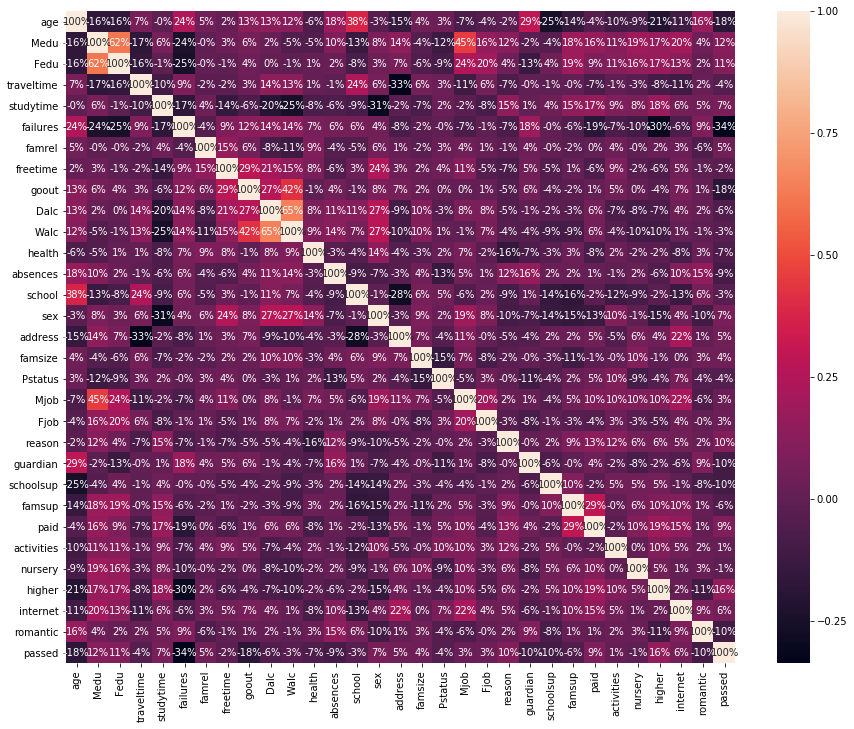

In [28]:
plt.figure(figsize=[15,12])
sns.heatmap(df.corr(),annot=True,fmt='0.0%')
plt.show()

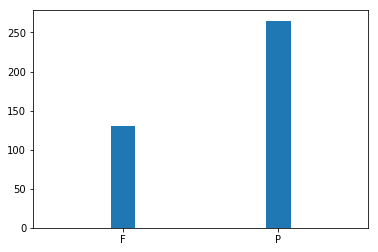

In [29]:
plt.hist(df['passed'],range=[-0.5,1.5],rwidth=0.8)
plt.xticks(range(2),"FP")
plt.show()

In [30]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school',
       'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'passed'],
      dtype='object')

In [31]:
df.head(1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
0,18,4,4,2,2,0,4,3,4,1,...,1,1,0,0,0,1,1,0,0,0


In [32]:
df.shape

(395, 31)

### Model Building

In [33]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
X = df.iloc[:,0:30]
y = df['passed']

In [36]:
print(X.shape)
print(y.shape)

(395, 30)
(395,)


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [38]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
log_pred = logistic.predict(X_test)
print(accuracy_score(y_test,log_pred))

0.696969696969697


In [39]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
print(accuracy_score(y_test,tree_pred))

0.5656565656565656


In [40]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)
print(accuracy_score(y_test,forest_pred))

0.6565656565656566


In [41]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
ada_pred = adaboost.predict(X_test)
print(accuracy_score(y_test,ada_pred))

0.6464646464646465


In [42]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print(accuracy_score(y_test,xgb_pred))

0.6565656565656566


In [43]:
#feature_Selection
#hyperparameter_tuning
#scaling

### Feature selection

1.Using Random forest

In [44]:
pd.set_option('display.max_columns',None)

In [45]:
feature_importance = pd.Series(data = forest.feature_importances_, index = X_train.columns)

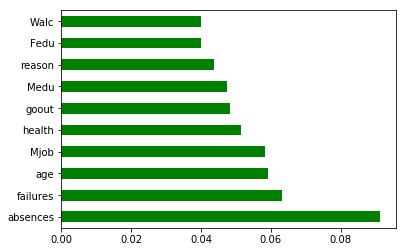

In [46]:
feature_importance.nlargest(10).plot(kind='barh',color='green')
plt.show()

In [47]:
x1 = df[['absences','failures','age','health','goout','Medu','Walc','freetime','Mjob','studytime']]
y1 = df['passed']

In [48]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=42)

In [57]:
logistic1 = LogisticRegression()
logistic1.fit(x1_train,y1_train)
log_pred1 = logistic1.predict(x1_test)
print(accuracy_score(y1_test,log_pred1))

0.7272727272727273


In [62]:
forest1 = RandomForestClassifier()
forest1.fit(x1_train,y1_train)
forest_pred1 = forest1.predict(x1_test)
print(accuracy_score(y1_test,forest_pred1))

0.7070707070707071


2. Lasso Regression

In [51]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [52]:
feature_select = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_select.fit(X_train,y_train)
feature_select.get_support()
selected_features = X_train.columns[(feature_select.get_support())]
selected_features

Index(['age', 'Medu', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
       'Walc', 'health', 'absences', 'sex', 'Pstatus', 'Mjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'nursery', 'higher'],
      dtype='object')

In [53]:
x2 = df[['age', 'Medu', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
       'Walc', 'health', 'absences', 'sex', 'Pstatus', 'Mjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'nursery', 'higher']]
y2 = df['passed']

In [54]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.25,random_state=42)

In [63]:
logistic2 = LogisticRegression()
logistic2.fit(x2_train,y2_train)
log_pred2 = logistic2.predict(x2_test)
print(accuracy_score(y2_test,log_pred2))

0.7070707070707071


In [65]:
forest2 = RandomForestClassifier()
forest2.fit(x2_train,y2_train)
forest_pred2 = forest2.predict(x2_test)
print(accuracy_score(y2_test,forest_pred2))

0.7272727272727273


I decided to work with less features selected through random forest
feature importance

### Hyperparameter Tuning

In [ ]:
#creating first pipeline
pipe = Pipeline([('classifier',forest1())])
#create a param grid
param_grid = [
    {
        'classifier':[logistic1()],
        'classifier_penalty':['11','12'],
        'classifier_c':Np.logspace(-4,4,20),
        'classifier_solver':['liblinear']
    }
    {
        'classifer':[forest1()],
        'classifer_n_estimators':list(range(10,101,10)),
        'classif_max_features':list(range(6,32,5))
    }
]

clf = GridSearchCV(pipe,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
#fit on data
best_clf = clf.fit(x1_train,y1_train)

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


In [ ]:
#LogisticRegression

In [ ]:
#GridSearch

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [81]:
parameters = [
    {
        "C":np.logspace(-4,4,20),
        "penalty":['l1','l2'],
        'solver':['liblinear']
    }
]

In [82]:
grid_search = GridSearchCV(estimator = logistic1,param_grid = parameters,cv=3,verbose=True)

In [83]:
best_grid = grid_search.fit(x1_train,y1_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.4s finished


In [84]:
best_grid.best_score_

0.7398648648648649

In [85]:
best_grid.best_params_

{'C': 0.08858667904100823, 'penalty': 'l2', 'solver': 'liblinear'}

In [92]:
logistic_1 = LogisticRegression(C=  0.08858667904100823, penalty = 'l2',solver='liblinear')

In [93]:
logistic_1.fit(x1_train,y1_train)
log_pred_1 = logistic_1.predict(x1_test)
print(accuracy_score(y1_test,log_pred_1))

0.7171717171717171


In [ ]:
#Random Search

In [ ]:
LogisticRegression()

In [101]:
hyperparameter_grid ={
    "penalty":['l1','l2'],
    'solver':['liblinear'],
    "fit_intercept":[True,False],
    'warm_start':[True,False]
}

In [102]:
random_search = RandomizedSearchCV(estimator=logistic1,param_distributions=hyperparameter_grid,cv=3,n_iter=5,verbose=5,random_state=42)

In [103]:
random_search.fit(x1_train,y1_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] warm_start=False, solver=liblinear, penalty=l1, fit_intercept=True 
[CV]  warm_start=False, solver=liblinear, penalty=l1, fit_intercept=True, score=0.73, total=   0.0s
[CV] warm_start=False, solver=liblinear, penalty=l1, fit_intercept=True 
[CV]  warm_start=False, solver=liblinear, penalty=l1, fit_intercept=True, score=0.7448979591836735, total=   0.0s
[CV] warm_start=False, solver=liblinear, penalty=l1, fit_intercept=True 
[CV]  warm_start=False, solver=liblinear, penalty=l1, fit_intercept=True, score=0.7040816326530612, total=   0.0s
[CV] warm_start=False, solver=liblinear, penalty=l1, fit_intercept=False 
[CV]  warm_start=False, solver=liblinear, penalty=l1, fit_intercept=False, score=0.73, total=   0.0s
[CV] warm_start=False, solver=liblinear, penalty=l1, fit_intercept=False 
[CV]  warm_start=False, solver=liblinear, penalty=l1, fit_intercept=False, score=0.7448979591836735, total=   0.0s
[CV] warm_start=False, solver

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  warm_start=False, solver=liblinear, penalty=l2, fit_intercept=False, score=0.73, total=   0.0s
[CV] warm_start=False, solver=liblinear, penalty=l2, fit_intercept=False 
[CV]  warm_start=False, solver=liblinear, penalty=l2, fit_intercept=False, score=0.7448979591836735, total=   0.0s
[CV] warm_start=False, solver=liblinear, penalty=l2, fit_intercept=False 
[CV]  warm_start=False, solver=liblinear, penalty=l2, fit_intercept=False, score=0.7142857142857143, total=   0.0s
[CV] warm_start=True, solver=liblinear, penalty=l2, fit_intercept=True 
[CV]  warm_start=True, solver=liblinear, penalty=l2, fit_intercept=True, score=0.73, total=   0.0s
[CV] warm_start=True, solver=liblinear, penalty=l2, fit_intercept=True 
[CV]  warm_start=True, solver=liblinear, penalty=l2, fit_intercept=True, score=0.7448979591836735, total=   0.0s
[CV] warm_start=True, solver=liblinear, penalty=l2, fit_intercept=True 
[CV]  warm_start=True, solver=liblinear, penalty=l2, fit_intercept=True, score=0.714285714285

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'fit_intercept': [True, False], 'warm_start': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=5)

In [105]:
random_search.best_params_

{'warm_start': False,
 'solver': 'liblinear',
 'penalty': 'l2',
 'fit_intercept': False}

In [106]:
random_search.best_score_

0.7297297297297297

In [107]:
logistic_2 = LogisticRegression(penalty='l2',solver='liblinear',warm_start=False,fit_intercept=False)

In [108]:
logistic_2.fit(x1_train,y1_train)
log_pred_2 = logistic_2.predict(x1_test)
print(accuracy_score(y1_test,log_pred_2)) 

0.7272727272727273


In [ ]:
#Random Forest

In [124]:
from scipy.stats import randint

In [128]:
parameters = {
    'n_estimators':[10,50,100,200,300,400,500],
    'criterion':['gini','entropy'],
    'max_features':randint(1,3),
    'max_depth':[3,5,10,None],
    'bootstrap':[True,False],
    'min_samples_leaf':list(range(1,10,5))
}

In [132]:
forest_random_search = RandomizedSearchCV(estimator=forest1,param_distributions=parameters,cv=5,n_iter=10,
                                         n_jobs=4,verbose=5,random_state=42)

In [133]:
forest_random_search.fit(x1_train,y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   23.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'n_estimators': [10, 50, 100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002AE865425F8>, 'max_depth': [3, 5, 10, None], 'bootstrap': [True, False], 'min_samples_leaf': [1, 6]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=5)

In [134]:
forest_random_search.best_score_

0.7398648648648649

In [135]:
forest_random_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 6,
 'n_estimators': 400}

In [140]:
forest_2 = RandomForestClassifier(bootstrap= False,
 criterion = 'gini',
 max_depth = 5,
 max_features = 2,
 min_samples_leaf = 6,
 n_estimators = 400)

In [146]:
forest_2.fit(x1_train,y1_train)
forest_pred_2 = forest_2.predict(x1_test)
print(accuracy_score(y1_test,forest_pred_2))

0.7171717171717171
